## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [33]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [34]:
cards = sample_cards(100, 6, 3)
cards

array([[ 4, 46, 57],
       [42, 71, 99],
       [28, 89, 91],
       [11, 24, 29],
       [10, 48, 59],
       [ 1, 21, 83]])

and access the cards of each player with 

In [35]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([ 4, 46, 57]), array([42, 71, 99]))

The lowest card in the game is

In [36]:
np.min(cards)

1

In [37]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

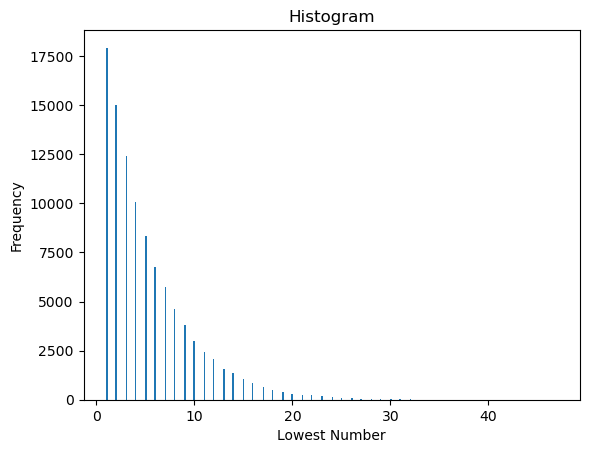

In [38]:
# To Do cell
minimum=[]
N=100
n=6
k=3
for i in range(100000):
    cards = sample_cards(N, n, k)
    minimum.append(np.min(cards))
plt.hist(minimum, bins=300)  
plt.title("Histogram")
plt.xlabel("Lowest Number")
plt.ylabel("Frequency")
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

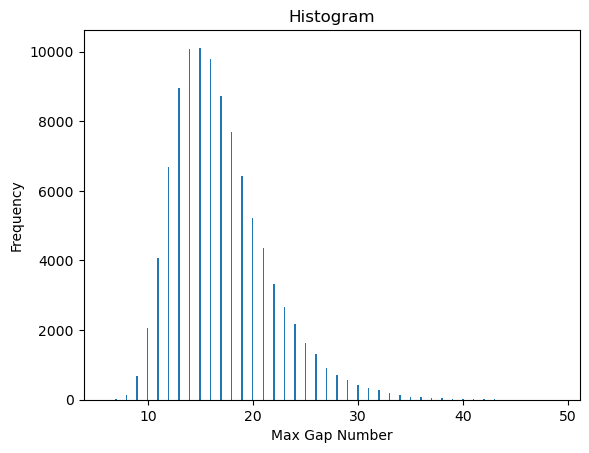

In [39]:
# To Do cell
whole_max_gap=[]
N=100
n=6
k=3
for i in range(100000):
    cards = sample_cards(N, n, k)
    sorted_cards = np.sort(cards.ravel())
    difference=np.diff(sorted_cards)
    whole_max_gap.append(max(difference))
plt.hist(whole_max_gap, bins=300) 
plt.title("Histogram")
plt.xlabel("Max Gap Number")
plt.ylabel("Frequency")
plt.show()

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

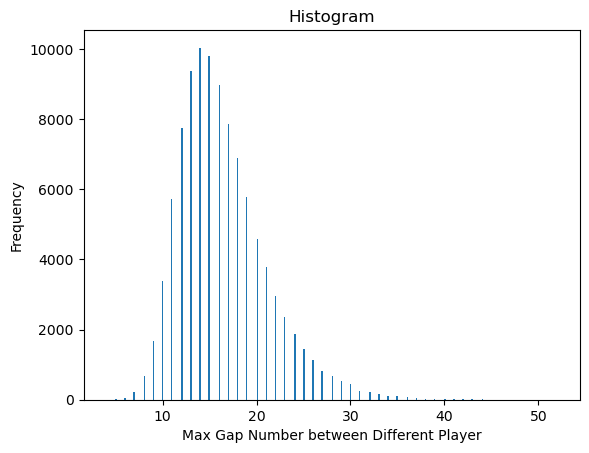

In [40]:
# To Do cell
diff_max_gap=[]
N=100
n=6
k=3
for j in range(100000):
    difference=[] 
    cards = sample_cards(N, n, k)
    flat_cards = cards.flatten()
    indices = np.repeat(np.arange(n), 3)
    sorted_cards = sorted(zip(flat_cards, indices))
    sorted_cards_add = []
    sorted_cards_add=sorted_cards[1:n*k]
    sorted_cards_add.append(sorted_cards[n*k-1])
    for i in range(n*k):
        value,index=sorted_cards[i]
        value_add,index_add=sorted_cards_add[i]
        if index != index_add:
            diff = abs(value_add - value)
            difference.append(diff)
    diff_max_gap.append(max(difference))
    
plt.hist(diff_max_gap, bins=300) 
plt.title("Histogram")
plt.xlabel("Max Gap Number between Different Player")
plt.ylabel("Frequency")
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

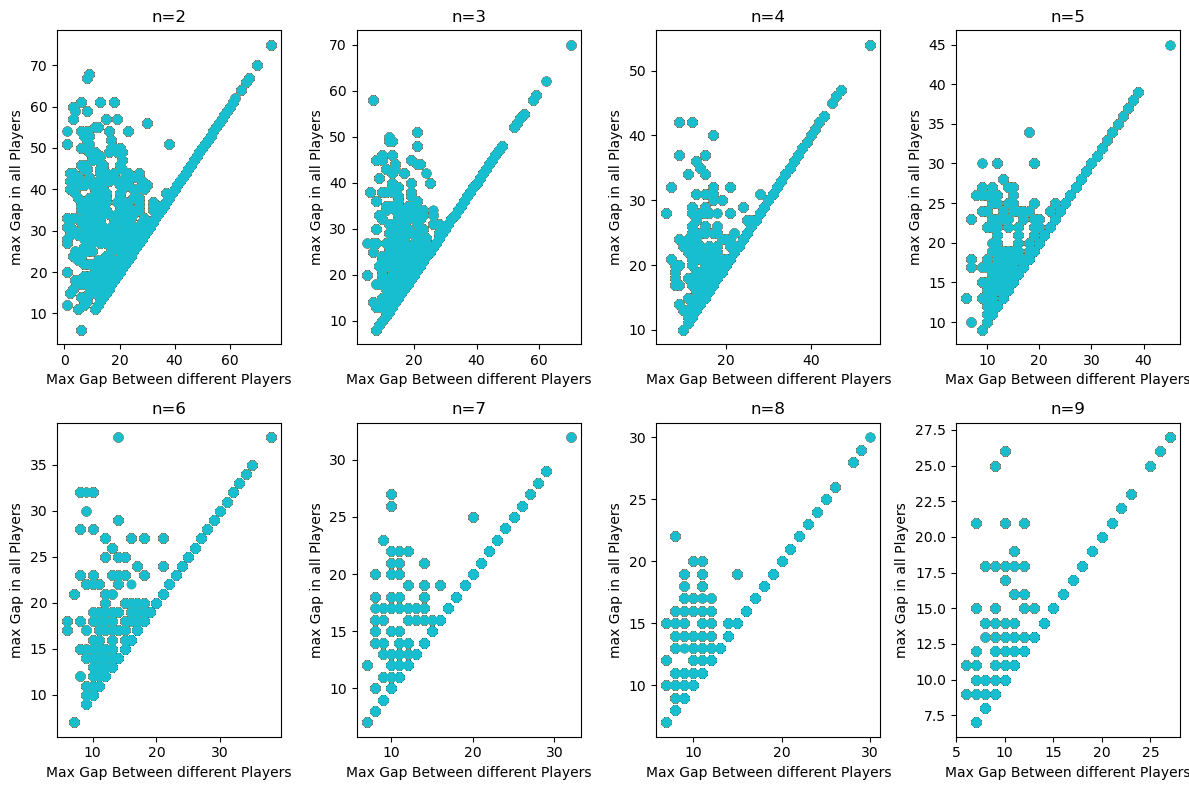

In [42]:
# To Do cell
#case 1: use different choice of players based on the same number of cards

N=100
k=3
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.ravel() 

for n, ax in enumerate(axes, start=2):
    diff_max_gap=[]
    whole_max_gap=[]
    for i in range(1000):
        cards = sample_cards(N, n, k)
        #whole_max
        sorted_cards = np.sort(cards.ravel())
        difference=np.diff(sorted_cards)
        whole_max_gap.append(max(difference))
        #max gap between difference players
        difference=[]
        flat_cards = cards.flatten()
        indices = np.repeat(np.arange(n), k)
        sorted_cards = sorted(zip(flat_cards, indices))
        sorted_cards_add = []
        sorted_cards_add=sorted_cards[1:n*k]
        sorted_cards_add.append(sorted_cards[n*k-1])
        for i in range(n*k):
            value,index=sorted_cards[i]
            value_add,index_add=sorted_cards_add[i]
            if index != index_add:
                diff = abs(value_add - value)
                difference.append(diff)
        diff_max_gap.append(max(difference))
        
        ax.scatter(diff_max_gap, whole_max_gap)
    
    ax.set_title(f'n={n}')  
    ax.set_xlabel('Max Gap Between different Players')
    ax.set_ylabel('max Gap in all Players')

plt.tight_layout()
plt.show()


Conclusion 1: for all choices of the number of players, the largest gap in all the players is always larger than the largest gap between defferent playes.

Conclusion 2: when the number of players increase, the max gaps of both two cases become smaller.

Conclusion 3: when the number of players increase, the difference between the max gaps of these two cases becomes smaller.

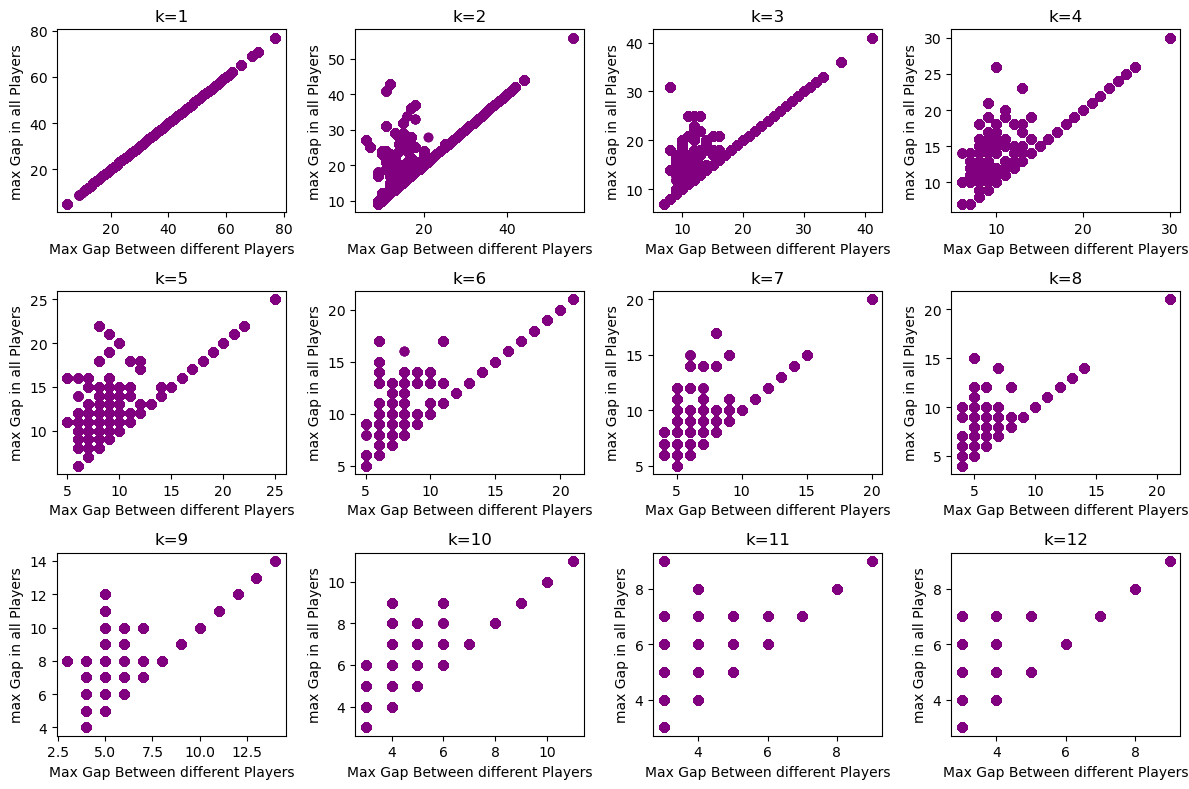

In [43]:
# To Do cell
#case 2: use different choice of the number of cards per players

N=100
n=6
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
axes = axes.ravel() 

for k, ax in enumerate(axes, start=1):
    diff_max_gap=[]
    whole_max_gap=[]
    for i in range(1000):
        cards = sample_cards(N, n, k)
        #whole_max
        sorted_cards = np.sort(cards.ravel())
        difference=np.diff(sorted_cards)
        whole_max_gap.append(max(difference))
        #max gap between difference players
        difference=[]
        flat_cards = cards.flatten()
        indices = np.repeat(np.arange(n), k)
        sorted_cards = sorted(zip(flat_cards, indices))
        sorted_cards_add = []
        sorted_cards_add=sorted_cards[1:n*k]
        sorted_cards_add.append(sorted_cards[n*k-1])
        for i in range(n*k):
            value,index=sorted_cards[i]
            value_add,index_add=sorted_cards_add[i]
            if index != index_add:
                diff = abs(value_add - value)
                difference.append(diff)
        diff_max_gap.append(max(difference))
        
        ax.scatter(diff_max_gap, whole_max_gap,c='purple')
    
    ax.set_title(f'k={k}')  
    ax.set_xlabel('Max Gap Between different Players')
    ax.set_ylabel('max Gap in all Players')

plt.tight_layout()
plt.show()
        

Conclusion 1: for all choices of the number of cards per player, the largest gap in all the players is always larger than the largest gap between defferent playes.

Conclusion 2: when the number of cards per player increase, the max gaps of both two cases become smaller.

Conclusion 3: when the number of  cards per player increase, the difference between the max gaps of these two cases becomes smaller.

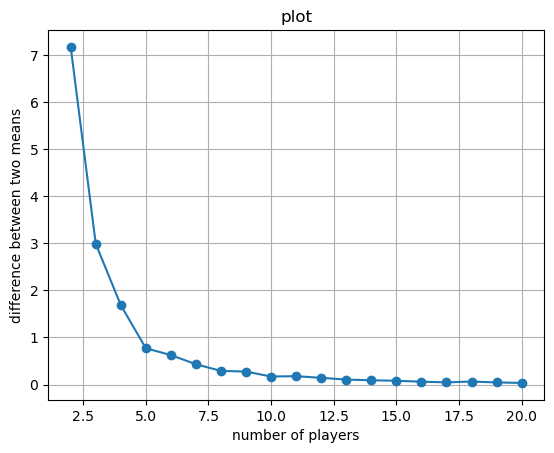

In [44]:
#Compute the mean of the two distributions. 
N=100
k=3
diff_mean=[]
num_player=[i for i in range(2, 21)]
for n in range(2,21):
    diff_max_gap=[]
    whole_max_gap=[]
    for i in range(1000):
        cards = sample_cards(N, n, k)
        #whole_max
        sorted_cards = np.sort(cards.ravel())
        difference=np.diff(sorted_cards)
        whole_max_gap.append(max(difference))
        #max gap between difference players
        difference=[]
        flat_cards = cards.flatten()
        indices = np.repeat(np.arange(n), k)
        sorted_cards = sorted(zip(flat_cards, indices))
        sorted_cards_add = []
        sorted_cards_add=sorted_cards[1:n*k]
        sorted_cards_add.append(sorted_cards[n*k-1])
        for i in range(n*k):
            value,index=sorted_cards[i]
            value_add,index_add=sorted_cards_add[i]
            if index != index_add:
                diff = abs(value_add - value)
                difference.append(diff)
        diff_max_gap.append(max(difference))
    mean_whole=sum(whole_max_gap)/len(whole_max_gap)
    mean_diff=sum(diff_max_gap)/len(diff_max_gap)
    diff_mean.append(mean_whole-mean_diff)

plt.plot(num_player, diff_mean, marker='o', linestyle='-')

plt.xlabel('number of players')
plt.ylabel('difference between two means')
plt.title('plot')
plt.grid(True)
plt.show()

Conclusion: when the number of players n increase, the difference of the mean of the two distributions becomes smaller. Therefore, the number of players is smaller, the difference is larger.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

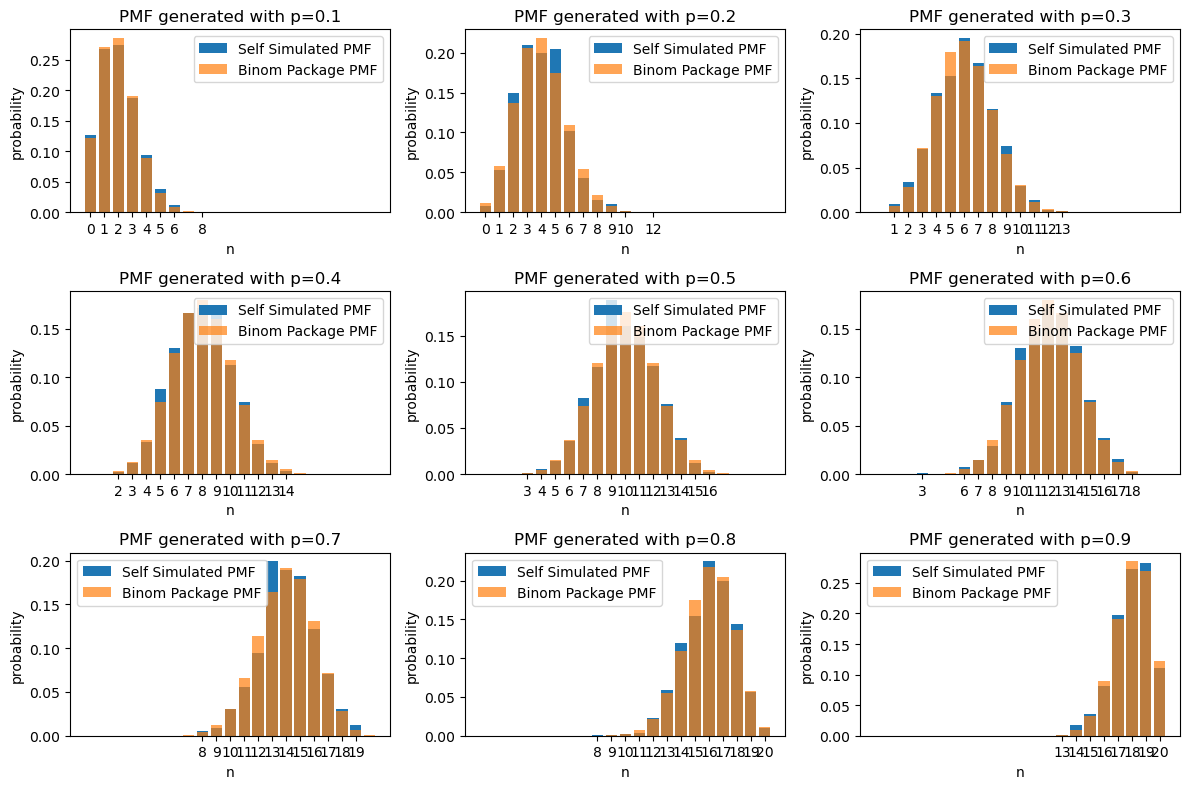

In [45]:
# To Do cell
import random
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # 八个不同的 p 值
n=20
p=0.3
sample_size=1000

fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.ravel()

for i, p in enumerate(p_values):
    # Use my self simulation method to generate binomial data
    def sample_game(n, p):
        binom = []
        for i in range(sample_size):
            u = random.random()
            k = 0
            q = (1 - p) ** n
            F = q
            for j in range(n + 1):
                if u < F:
                    binom.append(k)
                    break
                else:
                    q = (n - k) * (k + 1) ** (-1) * p * ((1 - p) ** (-1)) * q
                    F += q
                    k += 1
        return binom

    simulated_bin = sample_game(n, p)

    # Convert simulation results to PMF
    unique_values, counts = np.unique(simulated_bin, return_counts=True)
    total_observations = len(simulated_bin)
    frequencies = counts / total_observations

    # Use scipy.stats to generate binomial data
    random_samples = np.random.binomial(n, p, size=sample_size)
    x = np.arange(0, n + 1)
    random_pmf = binom.pmf(x, n, p)

    # plot
    axes[i].bar(unique_values, frequencies, tick_label=unique_values, label=f'Self Simulated PMF')
    axes[i].bar(x, random_pmf, align='center', alpha=0.7, label=f'Binom Package PMF')
    axes[i].set_xlabel('n')
    axes[i].set_ylabel('probability')
    axes[i].set_title(f'PMF generated with p={p}')
    axes[i].legend()

plt.tight_layout()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

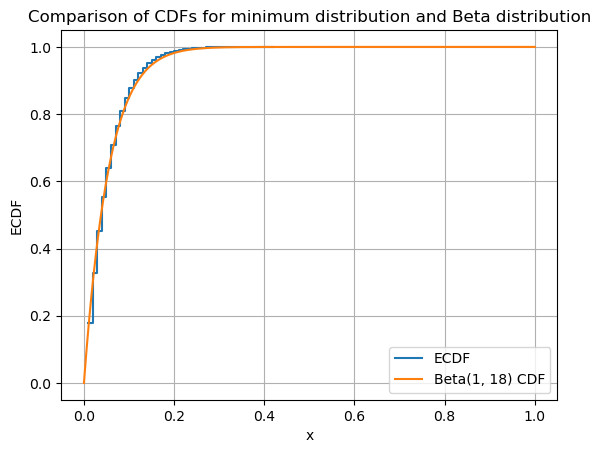

In [77]:
# To Do cell
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
minimum=[]
N=100
n=6
k=3
for i in range(100000):
    cards = sample_cards(N, n, k)
    minimum.append(np.min(cards))
minimum_reranged=[x / 100 for x in minimum]
sorted_min = np.sort(minimum_reranged)
#find ecdf of minimum distribution
unique_values, counts = np.unique(sorted_min, return_counts=True)
ecdf_values = np.cumsum(counts) / len(sorted_min)

#find cdf of beta distribution
k_parameter = 1
n_parameter=n*k
n_plus_1_minus_k = n_parameter + 1 - k_parameter
x = np.linspace(0, 1, 100000)
cdf = beta.cdf(x,  k_parameter, n_plus_1_minus_k)

# 3. plot two cdf
plt.step(unique_values, ecdf_values, where='post', label='ECDF')
plt.plot(x, cdf, label=f'Beta({k_parameter}, {n_plus_1_minus_k}) CDF')
plt.xlabel('x')
plt.ylabel('ECDF')
plt.title('Comparison of CDFs for minimum distribution and Beta distribution')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

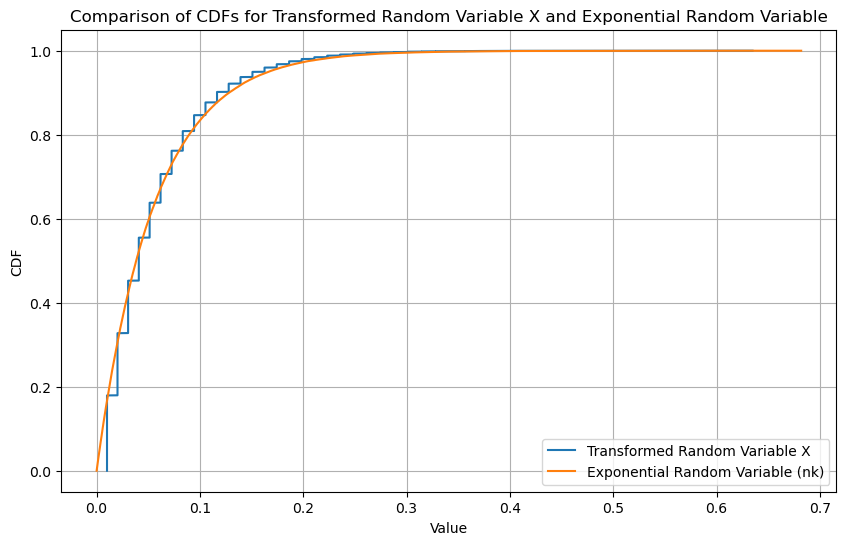

In [76]:
# To Do cell
sample_size=100000
minimum=[]
N=100
n=6
k=3
for i in range(sample_size):
    cards = sample_cards(N, n, k)
    minimum.append(np.min(cards))
X = -np.log(1 - np.array(minimum) / N)
# Generate a sample of exponential random variables with parameter nk
exponential_sample = np.random.exponential(scale=1/(n*k), size=sample_size)
# Sort the data for plotting CDF
X_sorted = np.sort(X)
exponential_sample_sorted = np.sort(exponential_sample)
# Create CDF data
cdf_X = np.arange(1, len(X_sorted) + 1) / len(X_sorted)
cdf_exponential = np.arange(1, len(exponential_sample_sorted) + 1) / len(exponential_sample_sorted)
# Plot CDFs
plt.figure(figsize=(10, 6))
plt.plot(X_sorted, cdf_X, label='Transformed Random Variable X')
plt.plot(exponential_sample_sorted, cdf_exponential, label=f'Exponential Random Variable ({n*k})')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('Comparison of CDFs for Transformed Random Variable X and Exponential Random Variable')
plt.legend()
plt.grid(True)
plt.show()


### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

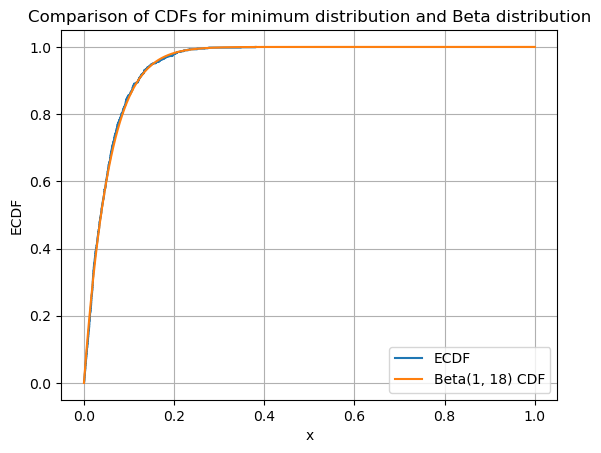

In [81]:
# To Do cell
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
minimum=[]
N=10000
n=6
k=3
for i in range(1000):
    cards = sample_cards(N, n, k)
    minimum.append(np.min(cards))
minimum_reranged=[x / N for x in minimum]
sorted_min = np.sort(minimum_reranged)
#find ecdf of minimum distribution
unique_values, counts = np.unique(sorted_min, return_counts=True)
ecdf_values = np.cumsum(counts) / len(sorted_min)

#find cdf of beta distribution
k_parameter = 1
n_parameter=n*k
n_plus_1_minus_k = n_parameter + 1 - k_parameter
x = np.linspace(0, 1, 1000)
cdf = beta.cdf(x,  k_parameter, n_plus_1_minus_k)

# 3. plot two cdf
plt.step(unique_values, ecdf_values, where='post', label='ECDF')
plt.plot(x, cdf, label=f'Beta({k_parameter}, {n_plus_1_minus_k}) CDF')
plt.xlabel('x')
plt.ylabel('ECDF')
plt.title('Comparison of CDFs for minimum distribution and Beta distribution')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Conclusion 1：when we increase the number of cards， we can see that it minimum number distribution is Almost coincident with beta distribution

In [84]:
#definition of sampling the cards with reposition
def sample_cards_reposition(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

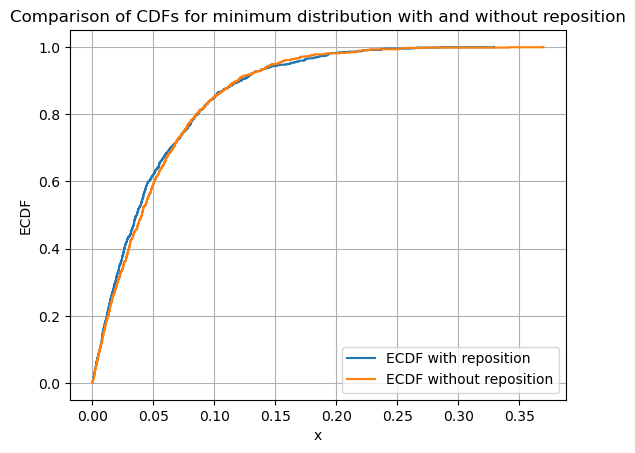

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
#find ecdf of minimum distribution without reposition
minimum=[]
N=10000
n=6
k=3
for i in range(1000):
    cards = sample_cards(N, n, k)
    minimum.append(np.min(cards))
minimum_reranged=[x / N for x in minimum]
sorted_min = np.sort(minimum_reranged)
unique_values, counts = np.unique(sorted_min, return_counts=True)
ecdf_values = np.cumsum(counts) / len(sorted_min)

#find ecdf of minimum distribution with reposition
minimum=[]
N=10000
n=6
k=3
for i in range(1000):
    cards = sample_cards_reposition(N, n, k)
    minimum.append(np.min(cards))
minimum_reranged=[x / N for x in minimum]
sorted_min = np.sort(minimum_reranged)
unique_values_reposition, counts = np.unique(sorted_min, return_counts=True)
ecdf_values_reposition = np.cumsum(counts) / len(sorted_min)

# 3. plot two cdf
plt.step(unique_values_reposition, ecdf_values_reposition, where='post', label='ECDF with reposition')
plt.step(unique_values, ecdf_values, where='post', label='ECDF without reposition')
plt.xlabel('x')
plt.ylabel('ECDF')
plt.title('Comparison of CDFs for minimum distribution with and without reposition')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Conclusion 2: In the cases of sampling with and without reposition compare as n*k<<N, I expect to see two distributions are really closed to each other, because when the N is far away larger than n*k, we can think that after each sampling, the number of remaining cards has almost no change, because the number of samples is very small relative to the total number N. Therefore, in both cases, the probability of each value being drawn is almost equal.

And after drawing their ECDF, I verified my expectations.

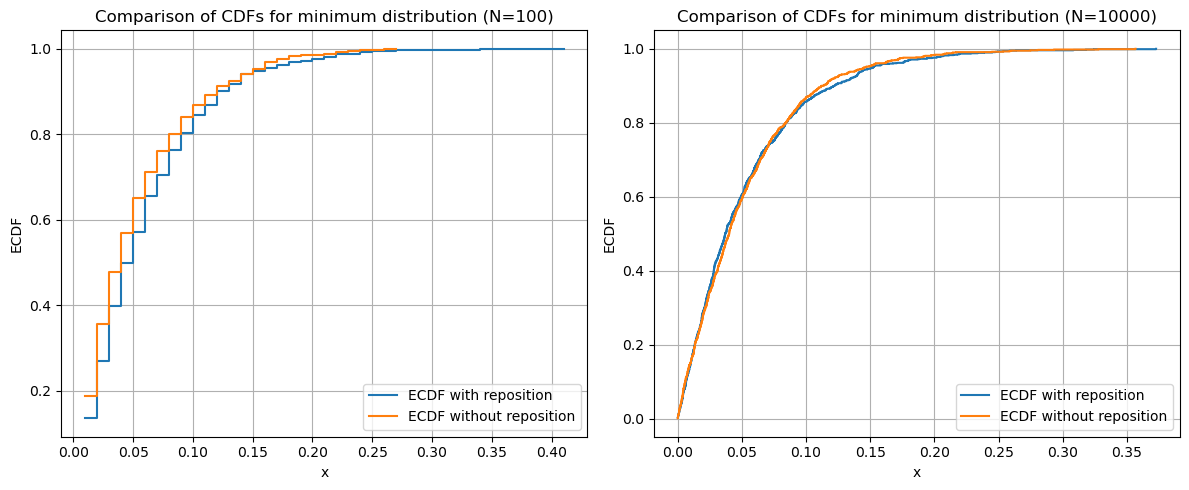

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
##case 1: N=100
#find ecdf of minimum distribution without reposition
minimum=[]
N=100
n=6
k=3
for i in range(1000):
    cards = sample_cards(N, n, k)
    minimum.append(np.min(cards))
minimum_reranged=[x / N for x in minimum]
sorted_min = np.sort(minimum_reranged)
unique_values_100, counts = np.unique(sorted_min, return_counts=True)
ecdf_values_100 = np.cumsum(counts) / len(sorted_min)
#find ecdf of minimum distribution with reposition
minimum=[]
for i in range(1000):
    cards = sample_cards_reposition(N, n, k)
    minimum.append(np.min(cards))
minimum_reranged=[x / N for x in minimum]
sorted_min = np.sort(minimum_reranged)
unique_values_reposition_100, counts = np.unique(sorted_min, return_counts=True)
ecdf_values_reposition_100 = np.cumsum(counts) / len(sorted_min)

##case 1: N=10000
#find ecdf of minimum distribution without reposition
minimum=[]
N=10000
n=6
k=3
for i in range(1000):
    cards = sample_cards(N, n, k)
    minimum.append(np.min(cards))
minimum_reranged=[x / N for x in minimum]
sorted_min = np.sort(minimum_reranged)
unique_values_10000, counts = np.unique(sorted_min, return_counts=True)
ecdf_values_10000 = np.cumsum(counts) / len(sorted_min)
#find ecdf of minimum distribution with reposition
minimum=[]
for i in range(1000):
    cards = sample_cards_reposition(N, n, k)
    minimum.append(np.min(cards))
minimum_reranged=[x / N for x in minimum]
sorted_min = np.sort(minimum_reranged)
unique_values_reposition_10000, counts = np.unique(sorted_min, return_counts=True)
ecdf_values_reposition_10000 = np.cumsum(counts) / len(sorted_min)


#plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].step(unique_values_reposition_100, ecdf_values_reposition_100, where='post', label='ECDF with reposition')
axes[0].step(unique_values_100, ecdf_values_100, where='post', label='ECDF without reposition')
axes[0].set_xlabel('x')
axes[0].set_ylabel('ECDF')
axes[0].set_title('Comparison of CDFs for minimum distribution (N=100)')
axes[0].legend(loc='lower right')
axes[0].grid(True)

axes[1].step(unique_values_reposition_10000, ecdf_values_reposition_10000, where='post', label='ECDF with reposition')
axes[1].step(unique_values_10000, ecdf_values_10000, where='post', label='ECDF without reposition')
axes[1].set_xlabel('x')
axes[1].set_ylabel('ECDF')
axes[1].set_title('Comparison of CDFs for minimum distribution (N=10000)')
axes[1].legend(loc='lower right')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Conclusion 3: when n*k<<N,compared with N=100, the difference between the two sampling strategies will lead to more similar results.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Hongyi Lu (GitHub user name: Hongyi2001)
- Member No2: 
- Member No3: